In [83]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Crude oil prices

In [84]:
crude_oil_prices = pd.read_csv("data/DCOILBRENTEU.csv",
                   parse_dates=['observation_date'])  # Parse the 'Date' column as datetime

crude_oil_prices.set_index('observation_date', inplace=True)

# Rename the index to 'Date'
crude_oil_prices = crude_oil_prices.rename_axis('Date')

# Rename the other column to 'Dollars_per_Barrel'
# Assuming the other column is named 'DCOILBRENTEU'
crude_oil_prices = crude_oil_prices.rename(columns={'DCOILBRENTEU': 'Dollars_per_Barrel'})

# Drop the 'Country' and 'ISO3 Code' columns
crude_oil_prices = crude_oil_prices[['Dollars_per_Barrel']]

crude_oil_prices = crude_oil_prices.sort_index()

# Fill NaN values with the previous valid value (forward fill)
crude_oil_prices = crude_oil_prices.ffill()

In [85]:
crude_oil_prices.head()

,Dollars_per_Barrel
Date,
2014-12-31,55.27
2015-01-01,55.27
2015-01-02,55.38
2015-01-05,51.08
2015-01-06,50.12


In [86]:
fig = px.line(crude_oil_prices.reset_index(), x='Date', y='Dollars_per_Barrel', title='Crude Oil Prices in Germany from 2015 to 2025')
fig.show()

# European Wholesale Electricity

In [87]:
electricity_prices= pd.read_csv("data/european_wholesale_electricity_price_data_daily.csv",
                    parse_dates=['Date'])  # Parse the 'Date' column as datetime

electricity_prices.set_index('Date', inplace=True)

# Filter the DataFrame to include only rows where the Country is Germany
electricity_prices = electricity_prices[electricity_prices['Country'] == 'Germany']

# Drop the 'Country' and 'ISO3 Code' columns
electricity_prices = electricity_prices[['Price (EUR/MWhe)']]

electricity_prices = electricity_prices.rename(columns={'Price (EUR/MWhe)': 'Electricity_price'})

electricity_prices = electricity_prices.sort_index()

# Fill NaN values with the previous valid value (forward fill)
electricity_prices = electricity_prices.ffill()

In [88]:
# Display the first few rows of the filtered DataFrame to verify
electricity_prices.head()

,Electricity_price
Date,
2015-01-01,22.34
2015-01-02,22.34
2015-01-03,22.34
2015-01-04,22.34
2015-01-05,36.18


In [89]:
fig = px.line(electricity_prices.reset_index(), x='Date', y='Electricity_price', title='Electricity Prices in Germany from 2015 to 2025')
fig.show()

# Dutch TTF natural Gas future

In [90]:
gas_prices= pd.read_csv("data/Dutch TTF Natural Gas Futures Historical Data.csv",
                    parse_dates=['Date'])  # Parse the 'Date' column as datetime

gas_prices.set_index('Date', inplace=True)

gas_prices = gas_prices.sort_index()

gas_prices = gas_prices.rename(columns={'Price': 'Gas_future_price'})

gas_prices = gas_prices[['Gas_future_price']]

gas_prices = gas_prices.ffill()

gas_prices.head()

,Gas_future_price
Date,
2017-10-23,18.09
2017-10-24,17.96
2017-10-25,18.11
2017-10-26,18.07
2017-10-27,18.15


In [91]:
fig = px.line(gas_prices.reset_index(), x='Date', y='Gas_future_price', title='Gas future Prices in Europe from 2017 to 2025')
fig.show()

# Leur code de con

In [92]:
def read_consumption(
    file_netconnect: str = "data/AggregatedConsumptionData NetConnect.csv",
    file_gaspool: str = "data/Aggregated Consumption Date Market Area GASPOOL.csv",
    file_the: str = "data/AggregatedConsumptionData Trading Hub.csv",
) -> tuple([pd.Series, pd.Series, pd.Series]):
    """Reads historic natural gas consumption in MWh and returns them as a tuple of pandas series."""

    # Read NetConnect Germany CSV file
    ncg_consumption = pd.read_csv(file_netconnect, sep=";", index_col="DayOfUse")

    ncg_consumption.index = pd.to_datetime(ncg_consumption.index, format="%d.%m.%Y")

    # Convert kWh to MWh and aggregate different measurement types
    ncg_consumption = ncg_consumption.select_dtypes("number") / 1000
    ncg_consumption_aggregated = ncg_consumption.sum(axis="columns")

    # Read GASPOOL CSV file
    gaspool_consumption = pd.read_csv(file_gaspool, sep=";", index_col="Datum")

    gaspool_consumption.index = pd.to_datetime(
        gaspool_consumption.index, format="%d.%m.%Y"
    )
    gaspool_consumption_aggregated = gaspool_consumption.sum(axis="columns")

    # Read Trading Hub Europe CSV file
    the_consumption = pd.read_csv(file_the, sep=";", thousands=",", index_col="Gasday")

    the_consumption.index = pd.to_datetime(the_consumption.index, format="%d/%m/%Y")

    # Convert kWh to MWh and aggregate different measurement types
    the_consumption = the_consumption.select_dtypes("number") / 1000
    the_consumption_aggregated = the_consumption.sum(axis="columns")

    return tuple(
        [
            ncg_consumption_aggregated.sort_index(),
            gaspool_consumption_aggregated.sort_index(),
            the_consumption_aggregated.sort_index(),
        ]
    )

In [93]:
ncg_consumption, gaspool_consumption, the_consumption = read_consumption()
consumption_data = pd.concat([ncg_consumption.add(gaspool_consumption, fill_value=0), the_consumption])
df_consumption = consumption_data.to_frame(name='consumption')

# avoir le premier et le dernier index de la série
start_date = consumption_data.index[0].strftime("%Y-%m-%d")
end_date = consumption_data.index[-1].strftime("%Y-%m-%d")

weather = read_weather()

In [94]:
weather.head()

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunshine_duration (h),wind_speed_10m_max (km/h)
Date,,,,,
2000-01-01,2.2,-0.3,0.8,0.000000,12.5
2000-01-02,4.2,2.6,3.2,0.000000,16.2
2000-01-03,6.3,4.4,5.3,0.000000,20.0
2000-01-04,6.2,4.2,5.5,0.582544,21.1
2000-01-05,6.6,-1.1,3.9,6.064792,27.4


In [95]:
df_consumption.tail()

,consumption
2024-10-27,1914459.771
2024-10-28,2186914.778
2024-10-29,2330071.796
2024-10-30,2312481.125
2024-10-31,2256990.688


In [99]:
# List of DataFrames to merge
dfs = [gas_prices, electricity_prices, crude_oil_prices, weather, df_consumption]

# Merge all DataFrames on the index using an outer join
merged_df = pd.concat(dfs, axis=1, join='outer')

# Define the date range from '2017-10-23' to '2024-12-31'
date_range = pd.date_range(start='2018-01-01', end='2024-10-31', freq='D')

# Reindex the merged DataFrame to the desired date range
merged_df = merged_df.reindex(date_range)

# Optionally, fill missing data (NaN values) using forward fill, backward fill, or any method
# Example: Fill with forward fill (propagate the last valid value forward)
merged_df.ffill(inplace=True)

In [100]:
merged_df

,Gas_future_price,Electricity_price,Dollars_per_Barrel,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),sunshine_duration (h),wind_speed_10m_max (km/h),consumption
2018-01-01,NaN,-24.33,66.73,11.9,2.5,7.9,5.225247,29.0,2872933.069
2018-01-02,19.320,33.01,66.65,5.7,2.3,4.0,1.340633,18.9,3319345.364
2018-01-03,19.325,8.62,67.85,8.4,2.0,4.9,0.935156,37.4,3309903.522
2018-01-04,19.200,30.13,68.73,7.2,5.2,6.0,1.907136,36.6,3340101.707
2018-01-05,18.915,32.49,68.01,8.6,3.1,6.5,1.594464,31.3,3283875.272
...,...,...,...,...,...,...,...,...,...
2024-10-27,43.513,83.23,75.62,15.7,8.6,11.6,5.493553,22.5,1914459.771
2024-10-28,42.519,95.32,71.87,15.9,6.6,11.8,2.000000,17.4,2186914.778
2024-10-29,42.869,136.15,71.09,14.5,12.0,13.1,0.000000,16.4,2330071.796
2024-10-30,40.903,129.70,73.21,14.9,11.1,12.9,2.199706,18.5,2312481.125


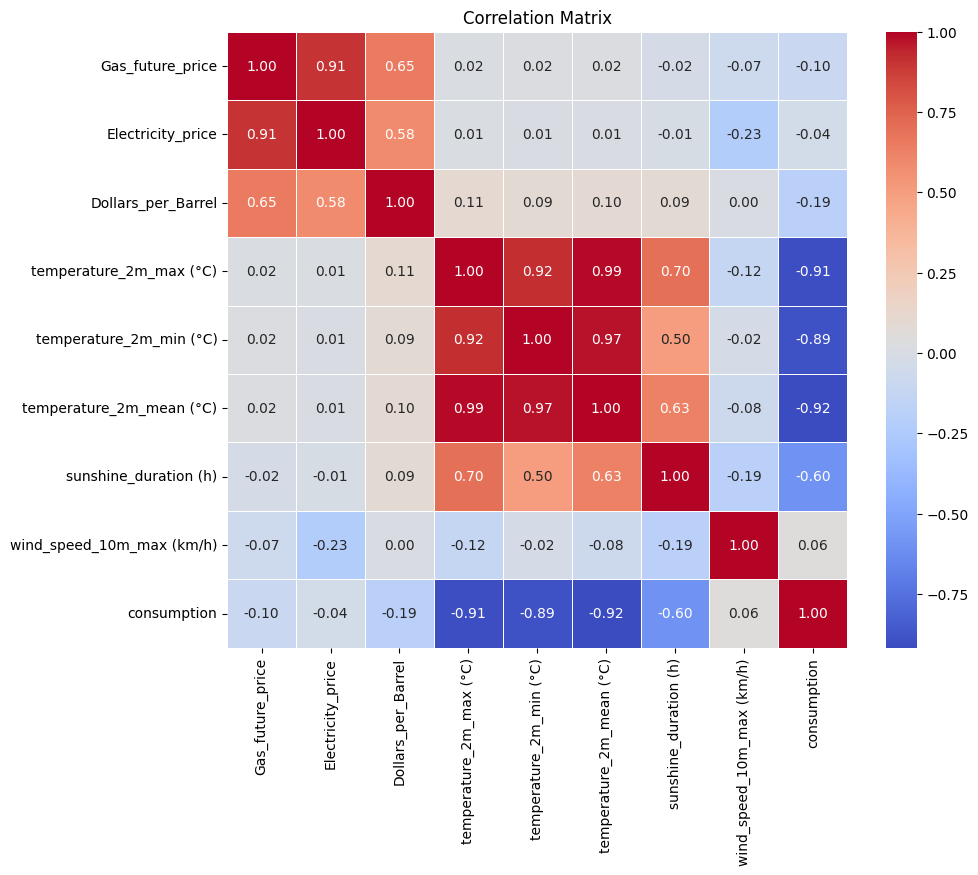

In [101]:
# Compute the correlation matrix
correlation_matrix = merged_df.corr()

# Set up the matplotlib figure (optional: adjust size)
plt.figure(figsize=(10, 8))

# Plot the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix')
plt.show()

In [105]:
# Liste des années à traiter
years = [2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Dictionnaire pour stocker les DataFrames
data_dict = {}

# Boucle pour traiter chaque fichier
for year in years:
    # Lire le fichier Excel
    file_path = f'data/emission-spot-primary-market-auction-report-data/emission-spot-primary-market-auction-report-{year}-data.xlsx'
    data = pd.read_excel(file_path)

# Utiliser la ligne 5 comme en-têtes et supprimer les 4 premières lignes
    data.columns = data.iloc[4]
    data = data[5:]

# Réinitialiser l'index
    data.reset_index(drop=True, inplace=True)

# Ajouter le DataFrame au dictionnaire avec l'année comme clé
    data_dict[year] = data


data=pd.concat([data2017,data2018,data2019,data2020,data2021,data2022,data2023,data2024])
data = data.drop(data.columns[0], axis=1)
data

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.